In [1]:
import numpy as np

1024 <class 'numpy.ndarray'>
1025 3 <class 'numpy.ndarray'>


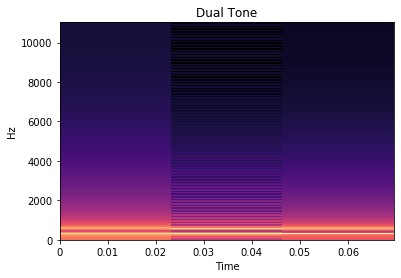

In [18]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt

N = 1024
T = 1.0 / 44100.0
f1 = 697
f2 = 1209
t = np.linspace(0.0, N*T, N)
y1 = 1.1 * np.sin(2 * np.pi * f1 * t)
y2 = 0.9 * np.sin(2 * np.pi * f2 * t)
y = y1 + y2
print(len(y), type(y))  #입력값에 대한 정보(별로 안중요) len(y[0])은 float어쩌고 하면서 안됨
D = np.abs(librosa.stft(y))
#D = librosa.stft(y) 이거는 안되는듯
print(len(D),len(D[0]),type(D))  #출력값에 대한 정보 1025*3 배열
librosa.display.specshow(librosa.amplitude_to_db(D, ref=np.max), y_axis='linear', x_axis='time')
plt.title('Dual Tone')
plt.show()

441000
[ 0.          0.          0.         ... -0.00204468 -0.00109863
 -0.00195312]
80 862 <class 'numpy.ndarray'>


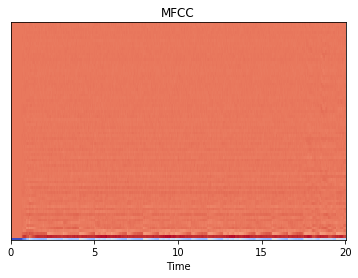

In [64]:
from IPython.display import Audio, display
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
#from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

samples, sample_rate = librosa.load(path= 'believer.wav', sr = 44100, mono = True, duration = 10)
print(len(samples)) #44.1kz * 10의 값이 나옴 1*441000 행렬인듯
print(samples)
#print(len(samples[0]),type(samples))  #입력값 행,열 , 여기 len은 실행이 안됨
mfccs = librosa.feature.mfcc(y = samples,sr = sample_rate, n_mfcc=80)
print(len(mfccs), len(mfccs[0]), type(mfccs))
#n = np.transpose(mfccs)
librosa.display.specshow(mfccs, x_axis='time')
plt.title('MFCC')
plt.show()

185 4794 <class 'numpy.ndarray'>


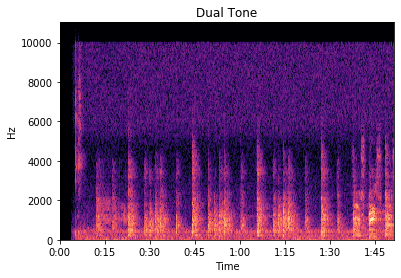

[0.         0.         0.         ... 0.03453146 0.08439964 0.19655763]
80 1 [[-1.8347159e+02]
 [ 3.1549908e+01]
 [ 1.3801996e+00]
 [ 5.8129616e+01]
 [ 3.4289589e+01]
 [ 1.0903194e+01]
 [ 1.6573500e+01]
 [ 1.8633066e+01]
 [ 4.3961177e+00]
 [-1.0890362e+01]
 [-1.5015627e+01]
 [ 1.4749062e+01]
 [-4.3714819e+00]
 [ 4.0957623e+00]
 [-1.5313754e+01]
 [-4.1398978e+00]
 [-1.7016167e+01]
 [-5.0443468e+00]
 [ 3.4471153e+01]
 [ 1.6462799e+01]
 [ 2.2517990e+01]
 [-6.7293901e+00]
 [-4.8167748e+00]
 [-6.9475183e+00]
 [ 8.1115561e+00]
 [-6.0768270e-01]
 [-1.3073264e+01]
 [ 1.4272025e+01]
 [ 1.0420528e+01]
 [-4.8593450e+00]
 [-2.5333355e+01]
 [-7.2939138e+00]
 [ 4.1420283e+00]
 [ 2.1987614e+01]
 [ 1.9251099e+01]
 [-9.2470436e+00]
 [-5.3579035e+00]
 [-1.6181217e+01]
 [ 9.1813421e-01]
 [-5.1170654e+00]
 [-2.5263515e+00]
 [-7.8721517e-01]
 [-4.7059398e+00]
 [ 3.2497835e+00]
 [ 1.2385570e+01]
 [ 5.6316042e-01]
 [-1.1286990e+01]
 [-2.2143641e+00]
 [ 6.7292728e+00]
 [ 5.6719065e-02]
 [ 6.7385206e+00]
 [-7.

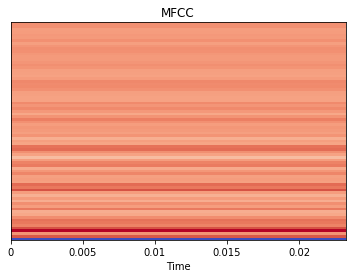

In [17]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt

samples, sample_rate = librosa.load(path= 'believer.wav', sr = 44100, mono = True, duration = 10)
#print(y, type(y))  #입력값에 대한 정보(별로 안중요)
D = np.abs(librosa.stft(samples, n_fft = 368))
print(len(D),len(D[0]),type(D))  #출력값에 대한 정보, len(D[0])(열)은 시간축을 의미하고 len(D)는 특색값인듯하다.
# 1025* 862 (n_fft = 2048), default
# 513* 1723 (n_fft = 1024)
# 257* 3446 (n_fft= 512)
#23ms 886,890 x가 시간 y는 feature


librosa.display.specshow(librosa.amplitude_to_db(D, ref=np.max), y_axis='linear', x_axis='time')
plt.title('Dual Tone')
plt.show()
print(D[0])
T = np.transpose(D) #4794*185 행렬
mfccs = librosa.feature.mfcc(y = T[4790], n_mfcc=80)
print(len(mfccs), len(mfccs[0]), mfccs)  #즉 각각의 행에 대해 mfcc를 실행하고 병합시키면 4794*80의 행렬이 나온다 
librosa.display.specshow(mfccs, x_axis='time')
plt.title('MFCC')
plt.show()

In [2]:
##11/12 (화)
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt

samples, sample_rate = librosa.load(path= 'believer.wav', sr = 44100, mono = True, duration = 10)
D = np.abs(librosa.stft(samples, n_fft=368,  hop_length=160  ))
print(len(D),len(D[0]),type(D))  #출력값에 대한 정보, len(D[0])(열)은 시간축을 의미하고 len(D)는 특색값인듯하다.
# 1025* 862 (n_fft = 2048), default
# 513* 1723 (n_fft = 1024)
# 257* 3446 (n_fft= 512)
#23ms 886,890 x가 시간 y는 feature

print(D[0])
T = np.transpose(D)
mfccs = np.matrix(librosa.feature.mfcc(y = T[0], n_mfcc=80))
print(len(mfccs), len(mfccs[0]))

mel_scale = np.transpose(mfccs)
for i in range(1,len(T)):
    mfccs = librosa.feature.mfcc(y = T[i], n_mfcc=80)
    mfccs_t = np.transpose(mfccs)
    mel_scale = np.vstack((mel_scale, mfccs_t))
print(len(mel_scale))

369 2757 <class 'numpy.ndarray'>
[0.         0.         0.         ... 0.01968949 0.12334881 0.24560171]
80 1
2757


In [28]:
##23ms 
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
samples, sample_rate = librosa.load(path= 'believer.wav', sr = 44100, mono = True, duration = 10)

D = np.abs(librosa.stft(samples, n_fft=368,  hop_length=160))
print(len(D),len(D[0]),type(D))  #출력값에 대한 정보, len(D[0])(열)은 시간축을 의미하고 len(D)는 특색값인듯하다.

T = np.transpose(D) #4794*185 행렬
mfccs = np.matrix(librosa.feature.mfcc(y = T[0], n_mfcc=80))
print(len(mfccs), len(mfccs[0]))
#print(mfccs)
mel_scale = np.transpose(mfccs)
#print(len(mel_scale),len(mel_scale[0]))
#print(len(m),len(m[0]))
for i in range(1,len(T)):
    mfccs = librosa.feature.mfcc(y = T[i], n_mfcc=80)
    mfccs_t = np.transpose(mfccs)
    mel_scale = np.vstack((mel_scale, mfccs_t))
print(len(mel_scale))
arr = np.array(mel_scale)
data = arr.tolist()
data_str=''
new_lst = []
for i in range(0,len(data)):
    for k in data[i]:
        data_str+= str(k)+' '
        new_lst+= str(k)
    data_str+=','
#print(data_str)
##print(data)
print(type(mfccs))
print(len(data), len(data[0]))

185 2757 <class 'numpy.ndarray'>
80 1
2757
<class 'numpy.ndarray'>
2757 80


In [37]:
##46 ms

D = np.abs(librosa.stft(samples, n_fft=736,  hop_length=160))
print(len(D),len(D[0]),type(D))  #출력값에 대한 정보, len(D[0])(열)은 시간축을 의미하고 len(D)는 특색값인듯하다.

T = np.transpose(D) #4794*185 행렬
mfccs = np.matrix(librosa.feature.mfcc(y = T[0], n_mfcc=80))
print(len(mfccs), len(mfccs[0]))
#print(mfccs)
mel_scale = np.transpose(mfccs)
print(len(mel_scale),len(mel_scale[0]))
#print(len(m),len(m[0]))
for i in range(1,len(T)):
    mfccs = librosa.feature.mfcc(y = T[i], n_mfcc=80)
    mfccs_t = np.transpose(mfccs)
    mel_scale = np.vstack((mel_scale, mfccs_t))
print(len(mel_scale))
arr = np.array(mel_scale)
data = arr.tolist()
data_str=''
new_lst = []
for i in range(0,len(data)):
    for k in data[i]:
        data_str+= str(k)+' '
        new_lst+= str(k)
    data_str+=','
#print(data_str)
##print(data)
print(type(mfccs))
print(len(data), len(data[0]))

369 2757 <class 'numpy.ndarray'>
80 1
1 1
2757
<class 'numpy.ndarray'>
2757 80


In [41]:
#93ms
D = np.abs(librosa.stft(samples, n_fft=1488,  hop_length=160))
print(len(D),len(D[0]),type(D))  #출력값에 대한 정보, len(D[0])(열)은 시간축을 의미하고 len(D)는 특색값인듯하다.

T = np.transpose(D) 
mfccs = np.matrix(librosa.feature.mfcc(y = T[0], n_mfcc=80))
print(len(mfccs), len(mfccs[0]))

mel_scale = np.transpose(mfccs)
mel_scale = mel_scale[0]
print(len(mel_scale))
print(len(T))
for i in range(1,len(T)):
    mfccs = librosa.feature.mfcc(y = T[i], n_mfcc=80)
    mfccs_t = np.transpose(mfccs)
    mel_scale = np.vstack((mel_scale, mfccs_t[0]))
print(len(mel_scale))
arr = np.array(mel_scale)
data = arr.tolist()

print(len(data), len(data[0]))

745 2757 <class 'numpy.ndarray'>
80 1
1
2757
2757
2757 80


In [10]:
mfccs_t = np.transpose(mfccs)
mfccs_t_t = np.vstack((mfccs_t,mfccs_t))
print(len(mfccs_t_t),len(mfccs_t_t[0]))
print(mfccs_t_t)

2 1
[[-1131.3708     0.         0.         0.         0.         0.
      0.         0.         0.         0.         0.         0.
      0.         0.         0.         0.         0.         0.
      0.         0.         0.         0.         0.         0.
      0.         0.         0.         0.         0.         0.
      0.         0.         0.         0.         0.         0.
      0.         0.         0.         0.         0.         0.
      0.         0.         0.         0.         0.         0.
      0.         0.         0.         0.         0.         0.
      0.         0.         0.         0.         0.         0.
      0.         0.         0.         0.         0.         0.
      0.         0.         0.         0.         0.         0.
      0.         0.         0.         0.         0.         0.
      0.         0.    ]
 [-1131.3708     0.         0.         0.         0.         0.
      0.         0.         0.         0.         0.         0.
      0.   

In [23]:
A = np.matrix('1 10;2 20')
B = np.matrix('3 30')
#B = np.matrix('')
display(A,B)
C =np.vstack((A,B))
display(C)

matrix([[ 1, 10],
        [ 2, 20]])

matrix([[ 3, 30]])

matrix([[ 1, 10],
        [ 2, 20],
        [ 3, 30]])

In [27]:
samples, sample_rate = librosa.load(path= 'believer.wav', sr = 44100, mono = True, duration = 10)
D = np.abs(librosa.stft(samples, n_fft =368, hop_length =160))#n_fft=1488))
print(len(D),len(D[0]),type(D))
# 1025* 862 (n_fft = 2048), default
# 513* 1723 (n_fft = 1024)
# 257* 3446 (n_fft= 512)
#23ms 886,890 x가 시간 y는 feature

185 2757 <class 'numpy.ndarray'>


In [ ]:


185 2757
369 2757
745 2757